<h1 style="font-family: Georgia; font-size:3em;color:#2462C0; font-style:bold">
Support Vector Machines (SVMs)
</h1><br>
We'll be using support vector machines on different 2D datasets. First, we'll try changing *Penalty Parameter C* when applying it on linearly separable data and see how this would change the decision boundary and, as a result, may overfit/underfit the training data. Next, we'll be applying non-linear SVMs on nonlinearly separable data and see how hyperparameters such as polynomial degree $d$ and $\gamma = \frac{1}{(2\sigma^2)}$ would lead to different decision boundaries that also may underfit/overfit the data.

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Linearly Separable Dataset
</h2><br>
hyperplance is an (n - 1) affine subspace that cuts the n-dimensional space into two halves. For 2-dimensional space, it's a straight line. Below is the equation for n-dimension hyperplane:

$$\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = 0\\{}$$
where $\theta = (\theta_0, \theta_1, \theta_2, ..., \theta_n)$ is normal vector (perpendicular) to the hyperplane.
SVMs linear classifier tries to find the best hyperplane that separates data. This is done by:
1. Compute the euclidean distance of all the examples and the hyperplane.
2. Pick the examples that are closest to the hyperplane. Those are called **support vectors**. They are the most difficult examples to classify and have direct effect on the decision boundary (hyperplane). Therefore, only changes in support vectors changes the decision boundary and everything else has no effect as long as they don't cross the margins or the decision boundary.

    Positive support vectors: $\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = 1$

    Negative support vectors: $\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = -1$
3. Maximize the margin which is the width between support vectors of positive examples and negative examples.
4. The decision boundary will be the median between negative and positive margins.

<h3 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
Maximization problem:
</h3>
1. $margin\ width = (x_{+ve} - x_{-ve}) . \frac{\theta}{\|\theta\|} = \frac{2}{\|\theta\|}$. Maximizing $\frac{2}{\|\theta\|}$ is the same as minimizing the reciprocal $\frac{1}{2}{\|\theta\|}$ which is the same as minimizing $\frac{1}{2}{\|\theta\|^2}$.
2. Introduce $y^i = \{-1, 1\}$. Therefore:
$$Positive\ classes:\theta^Tx^i \geq 1 \Rightarrow y^i(\theta^Tx^i) \geq 1$$
$$Negative\ classes:\theta^Tx^i \leq 1 \Rightarrow y^i(\theta^Tx^i) \geq 1$$
3. Maximization problem formulation:
$$\min_{\theta} \frac{1}{2}\|\theta\|^2\\{}$$
$$s.t\quad y^i(\theta^Tx^i) \geq 1\\{}$$
$$\Rightarrow L = \frac{1}{2}\|{\theta}\|^2 - \sum_{i=1}^{m}\alpha_i[y^i(\theta^Tx^i)]\\{}$$
$$\frac{\partial L}{\partial \theta} = \theta - \sum_{i=1}^{m}\alpha_iy^ix^i = 0$$
$$\Rightarrow \theta = \sum_{i=1}^{m}\alpha_iy^ix^i\\{}$$
That shows that $\theta$ is a linear combinations of examples where support vectors will have the highest weights and the rest of examples will be zero.
$$\Rightarrow \max_{\alpha_i} \rightarrow L = \frac{1}{2} \sum_{i=1}^{m}\alpha_iy^ix^i \sum_{j=1}^{m}\alpha_jy^jx^j - \sum_{i=1}^{m}\alpha_iy^ix^i\sum_{j=1}^{m}\alpha_jy^jx^j + \sum_{i=1}^{m}\alpha_i\\{}$$
$$\Rightarrow L = \sum_{i=1}^{m}\alpha_i - \frac{1}{2} \sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy^iy^jx^i.x^j$$
The last equation shows that the maximization problem depends on the dot product of the examples which is a measure of the similarity between examples. For unit vectors, the dot product measures the angle between the two vectors. The bigger the angle, the less similar they are. We have 3 cases:
    * If the examples are disalike, the dot product will be zero and the examples will be perpendicular to each other. Therefore, they won't be counted at all.
    * If the examples are alike and predict the same class, then the second term of the lagrangian equation would be positive  $\rightarrow$ those examples would be downgraded.
    * If the examples are alike and predict different class, then the second term of the lagrangian equation would be negative  $\rightarrow$ those examples would be upgraded. Those are the critical examples.
Note that the type of correlation is *pearson correlation*.

Let's start by loading the data and plot it that helps us see how the data is distributed and what the decision boundary may look like.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

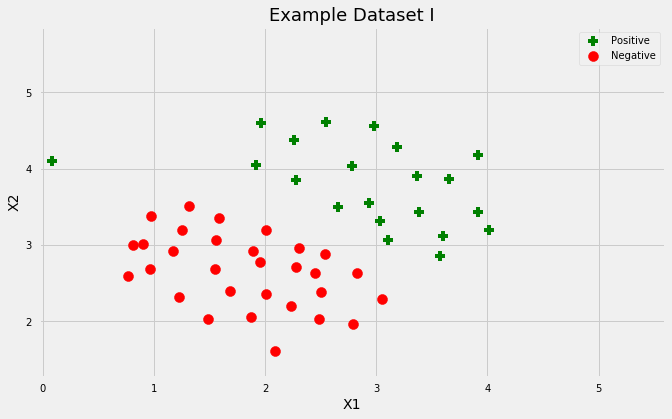

In [2]:
# Load data
data = loadmat('../data/ex6data1.mat')
X = data['X']
y = data['y']

# Define fn to plot 2D datasets
def plotData(X, y, x1_min_minus=0, x1_max_plus=0, x2_min_minus=0, x2_max_plus=0, title='Scatter plot'):
    '''
    X: feature matrix m * 2
    y: label vector m * 1
    title: title of the plot to be displayed
    Return: scatter plot of data colored using class each example belong to
    '''
    # use mask to split data when plotted to two different classes
    positive = (y == 1).ravel()
    negative = (y == 0).ravel()
        
    # plot the data
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(X[positive, 0], X[positive, 1], c='g', marker='+', s=100, label='Positive')
    ax.scatter(X[negative, 0], X[negative, 1], c='r', marker='o', s=100, label='Negative')
    plt.xlim([np.min(X[0]) - x1_min_minus, np.max(X[0] + x1_max_plus)])
    plt.ylim([np.min(X[1]) - x2_min_minus, np.max(X[1]) + x2_max_plus])
    plt.legend(loc='best')
    plt.xlabel('X1', fontsize=14)
    plt.ylabel('X2', fontsize=14)
    plt.title(title, fontsize=18);

plotData(X, y, 2, 1 , 1, 2, title='Example Dataset I')

As the graph above shows, the data is linearly separated. Let's build linear SVMs classifier using two different values for the penalty parameter C.

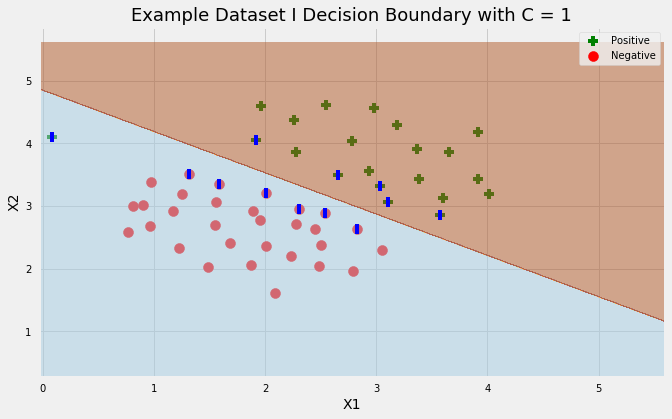

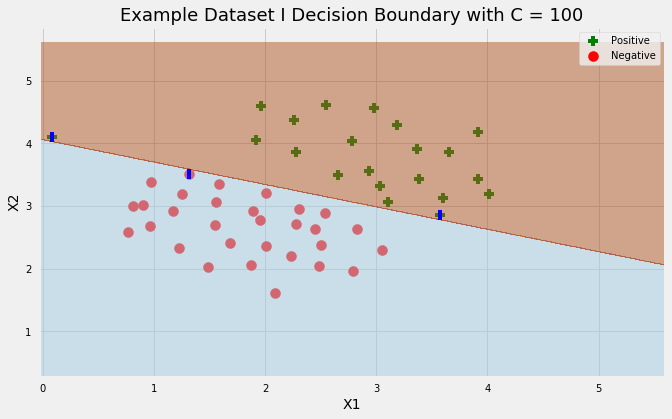

In [3]:
# Fit svm linear classifier using two different values of the penalty parameter C: 1 and 100
svClassifier_C1 = svm.SVC(C=1, kernel="linear")
svClassifier_C1.fit(X, y.ravel())
sv_C1 = svClassifier_C1.support_vectors_

svClassifier_C100 = svm.SVC(C=100, kernel="linear")
svClassifier_C100.fit(X, y.ravel())
sv_C100 = svClassifier_C100.support_vectors_

# Build grid to be used for contour plot
x1_min, x2_min = X[:, 0].min() - 1, X[:, 1].min() - 2
x1_max, x2_max = X[:, 0].max() + 2, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000), np.linspace(x2_min, x2_max, 1000))

# Use the grid as input to predict classes
Z_C1 = svClassifier_C1.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z_C100 = svClassifier_C100.predict(np.c_[xx1.ravel(), xx2.ravel()])


# Reshape to be a grid again
Z_C1 = Z_C1.reshape(xx1.shape)
Z_C100 = Z_C100.reshape(xx1.shape)

# Plot the the decision boundary and the training examples for C = 1 classifier
plotData(X, y, 2, 1, 2, 2, title="Example Dataset I Decision Boundary with C = 1")
plt.contourf(xx1, xx2, Z_C1, cmap=plt.cm.Paired, alpha = 0.5)
plt.scatter(sv_C1[:,0], sv_C1[:,1], c="b", marker="|", s = 100);

# Plot the the decision boundary and the training examples for C = 100 classifier
plotData(X, y, 2, 1, 2, 2, title="Example Dataset I Decision Boundary with C = 100")
plt.contourf(xx1, xx2, Z_C100, cmap=plt.cm.Paired, alpha = 0.5)
plt.scatter(sv_C100[:,0], sv_C100[:,1], c="b", marker="|", s=100);

The first graph shows the decision boudary of SVMs classifier with small penalty parameter *C = 1*. The example on the top left is misclassified. However; when we increased $C$ to 100, the decision boundary tilted to the left and now classifies all examples correctly. Therefore, As we increase the penalty parameter $C$, the model becomes more flexible and may overfit the data. On the other hand, as we decrease $C$ the model may underfit the data and have higher bias. The support vectors are the examples that has blue strip.

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Nonlinearly Separable Dataset
</h2><br>
One of the main reasons of why SVMs is very popular is its powerful performance in solving nonlinear classification porblems. One approach of solving the problem is to transform the input space into higher dimensional space that makes the new examples linearly separable and then train a linear SVMs classifier. Howerver, this approach is computationally very expensive of taking the dot products between all the pair examples. Therefore, we solve it using a kernel function that computes the similarity among examples where the kernel function replaces the dot product we had in the linear case. i.e replace $x^i . x^j$ with $k(x^i, x^j) = \phi(x^i) . \phi(x^j)$. Below is the most common kernels:
* **Radial (Guassian) Basis Function**:
$$f_i = exp\Big(-\frac {\|{x - l^i}\|^2} {2\sigma^2}\Big)\\{}$$
which can be simplified to
$$f_i = exp\Big(-\gamma {\|{x - l^i}\|^2}\Big)\\{}$$
* **Polynomial Kernel**:
$$f_i = K(x, l^i)^p$$
The term *kernel* can be interpreted as a *similarity* function between two pairs of examples. Since we have a negative sign in the case of 'rbf', the result would be a similarity score between 0 (completely disalike) and 1 (completely alike). The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. Therefore, as we increase gamma, the classifier becomes more flexible and may overfit the data. However; as we increase sigma, the model becomes less flexible and may underfit the data. Note that sigma ($\sigma^2$) measures how fast similarity metrics decreases to 0 when examples are further apart.

<h3 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
Radial (Guassian) Basis Function
</h3><br>
The graph below shows that the data is nonlinearly separable. So let's build two SVMs classifiers using two different values of gamma.

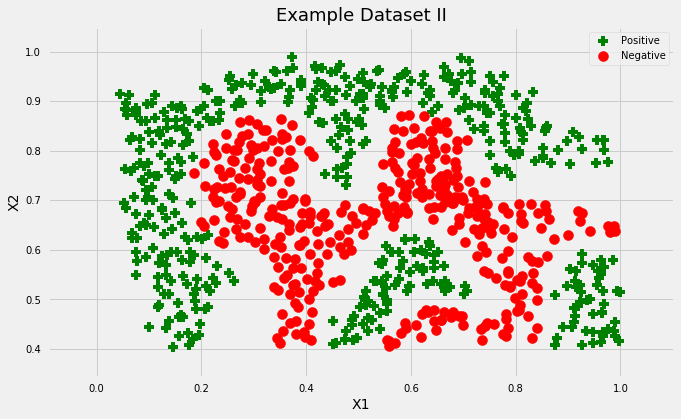

In [4]:
# Load data
data = loadmat("../data/ex6data2.mat")
X = data["X"]
y = data["y"]
plotData(X, y, 0.2, 0.5, -0.25, 0.4, title = "Example Dataset II")

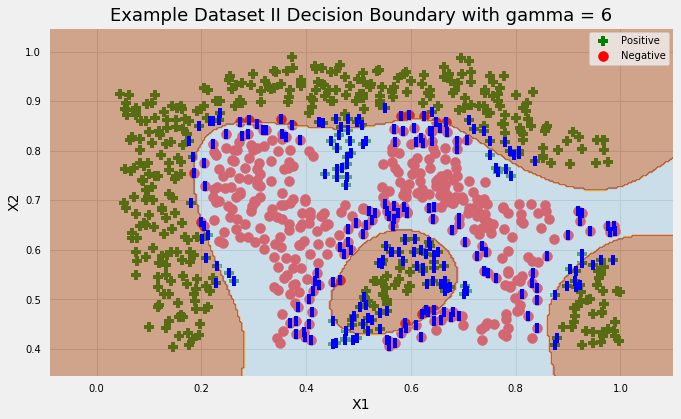

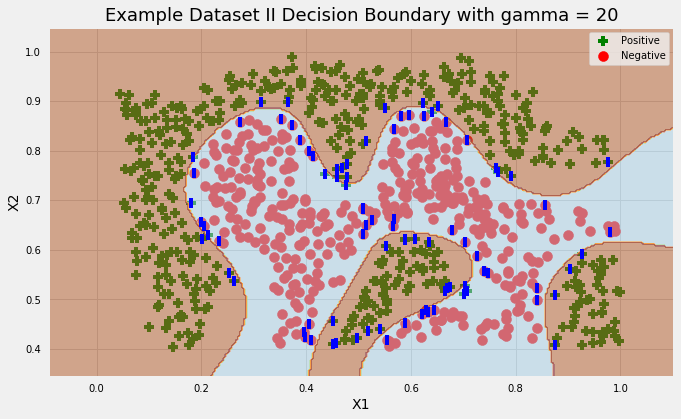

In [5]:
# Fit svm linear classifier using two different values of gamma: 6 and 20
svClassifier_gamma6 = svm.SVC(C=50, kernel="rbf", gamma=6)
svClassifier_gamma6.fit(X, y.ravel())
sv_gamma6 = svClassifier_gamma6.support_vectors_

svClassifier_gamma20 = svm.SVC(C=50, kernel="rbf", gamma=20)
svClassifier_gamma20.fit(X, y.ravel())
sv_gamma20 = svClassifier_gamma20.support_vectors_

# Build grid to be used for contour plot
x1_min, x2_min = X[:, 0].min() - 1, X[:, 1].min() - 2
x1_max, x2_max = X[:, 0].max() + 2, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000), np.linspace(x2_min, x2_max, 1000))

# Use the grid as input to predict classes
Z_gamma6 = svClassifier_gamma6.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z_gamma20 = svClassifier_gamma20.predict(np.c_[xx1.ravel(), xx2.ravel()])


# Reshape to be a grid again
Z_gamma6 = Z_gamma6.reshape(xx1.shape)
Z_gamma20 = Z_gamma20.reshape(xx1.shape)

# Plot the the decision boundary and the training examples for C = 1 classifier
plotData(X, y, 0.2, 0.5, -0.25, 0.4, title="Example Dataset II Decision Boundary with gamma = 6")
plt.contourf(xx1, xx2, Z_gamma6, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(sv_gamma6[:,0], sv_gamma6[:,1], c="b", marker="|", s=100, label="t");

# Plot the the decision boundary and the training examples for C = 100 classifier
plotData(X, y, 0.2, 0.5, -0.25, 0.4, title="Example Dataset II Decision Boundary with gamma = 20")
plt.contourf(xx1, xx2, Z_gamma20, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(sv_gamma20[:,0], sv_gamma20[:,1], c="b", marker="|", s=100, label="t");

By changing the value of gamma from 6 to 20, the classifier becomes very flexible and classified correctly most of the examples that the classifier with $\gamma = 6$ misclassified. Note that we're inspecting how well the classifier performs on training data which doesn't give us any indication about how well the classifier will generalize.

<h3 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
Polynomial Kernel
</h3><br>
Again, graph below shows that the data is nonlinearly separable too. But for this exercise, we'll build two SVMs classifiers using polynomial kernels and change the degree to see how that would change the decision boundary.

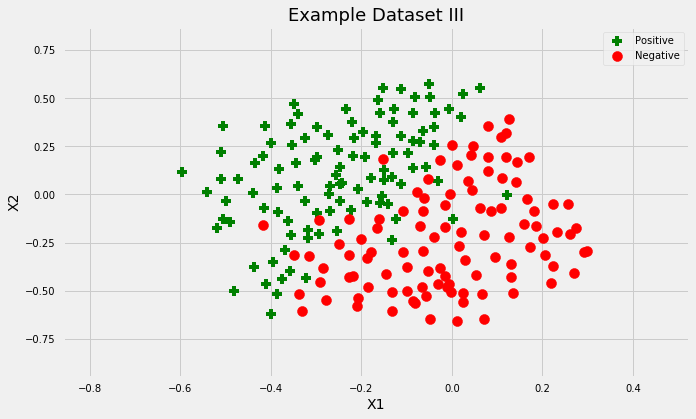

In [6]:
# Load data
data = loadmat("../data/ex6data3.mat")
X = data["X"]
y = data["y"]
plotData(X, y, 0.7, 0.1, 0.6, 0.4, title = "Example Dataset III")

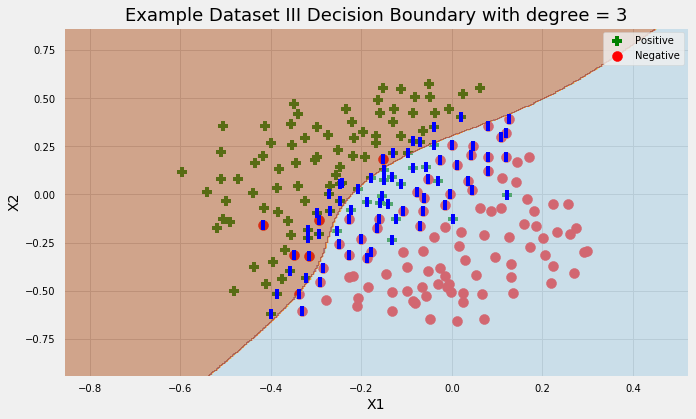

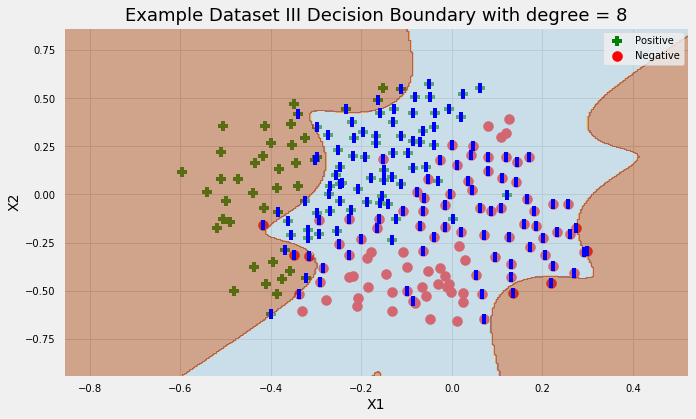

In [7]:
# Fit svm linear classifier using two different values of the polynomial degree: 3 and 5
svClassifier_degree3 = svm.SVC(C=1, kernel="poly", degree=3, gamma=10)
svClassifier_degree3.fit(X, y.ravel())
sv_degree3 = svClassifier_degree3.support_vectors_

svClassifier_degree8 = svm.SVC(C=1, kernel="poly", degree=8, gamma=10)
svClassifier_degree8.fit(X, y.ravel())
sv_degree8 = svClassifier_degree8.support_vectors_

# Build grid to be used for contour plot
x1_min, x2_min = X[:, 0].min() - 1, X[:, 1].min() - 2
x1_max, x2_max = X[:, 0].max() + 2, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000), np.linspace(x2_min, x2_max, 1000))

# Use the grid as input to predict classes
Z_degree3 = svClassifier_degree3.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z_degree8 = svClassifier_degree8.predict(np.c_[xx1.ravel(), xx2.ravel()])

# Reshape to be a grid again
Z_degree3 = Z_degree3.reshape(xx1.shape)
Z_degree8 = Z_degree8.reshape(xx1.shape)

# Plot the the decision boundary and the training examples for degree = 3
plotData(X, y, 0.7, 0.1, 0.6, 0.4, title="Example Dataset III Decision Boundary with degree = 3")
plt.contourf(xx1, xx2, Z_degree3, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(sv_degree3[:,0], sv_degree3[:,1], c="b", marker="|", s=100);

# Plot the the decision boundary and the training examples for degree = 5
plotData(X, y, 0.7, 0.1, 0.6, 0.4, title="Example Dataset III Decision Boundary with degree = 8")
plt.contourf(xx1, xx2, Z_degree8, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(sv_degree8[:,0], sv_degree8[:,1], c="b", marker="|", s=100);

Changing the polynomial degree from 3 to 8 make decision boundary more wiggly and tries to fit the data really well.

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Conclusion
</h2><br>
* SVMs works on binary classification problems only. In case we have $k \geq 3$ classes, we can use one-vs-all approach and build $k$ SVMs classifiers.
* SVMs classifier produce classes and not probability.
* Scale the data if the features are on very different scales.
* For linear SVMs classifier, $C$ is the only hyperparameter that control the penalty parameter where large values of C mean we are less tolerant for misclassification examples.
* If number of features is large relative to number of examples, use linear SVMs classifier or logistic regression.
* If number of features is small and number of examples is intermediate, use SVMs with Gaussian kernel.
* If number of features is small and number examples is large, add more features and then use logistic regression or linear SVMs.
* Only support vectors have influence on the decision boundary.
* Dot products and kernel functions are a measure of similarities between pair of examples.
* We project all examples onto theta vector that is normal to the decision boundary to compute how far they are from the decision boundary.
* The further (euclidean distance) the example from the decision boundary the more confident in our prediction of assigning the class. That's why support vectors are the most difficult examples to classify because they are the closest to the decision boundary.
* Linear SVMs quantifies similarities between examples using pearson correlation.